<a href="https://colab.research.google.com/github/chikelu/Godson_Portfolio/blob/main/Copy_of_mobile_phone_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import data libraries
import pandas as pd
import numpy as np
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# use the display package to show multiple output items
from IPython.display import display, HTML



In [3]:
%load_ext google.colab.data_table

In [ ]:
# display table with solid lines borders like in Kaggle
#pd.set_option('display.html', True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mobile phone price prediction.csv',index_col=0)
df_copy = df.copy()
display(df.head())

In [ ]:
# prompt: Using dataframe df: drop df index row

df = df.reset_index(drop=True) # Reset the index and drop the old index column


In [ ]:
display(df.head())
display(df.info())

In [ ]:
# remove the "," character from Price
df['Price'] = df['Price'].str.replace(',', '')
# convert the data type to float
df['Price'] = df['Price'].astype(float)

In [ ]:
df.describe()

In [ ]:
# move Price as the last column
cols = list(df.columns)
cols.remove('Price')
cols.append('Price')
df = df[cols]

In [ ]:
# data shape
display(df.shape)

In [ ]:
# use prettytable to show dataframe
from ipywidgets import *
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = list(df.columns)
pt.add_row(df.iloc[0])
print(pt)

In [ ]:
# print list of null %count
df.isnull().sum()/len(df)*100

In [ ]:
 # drop column Andriod_version has llot of nulls
 #df.drop('Android_version', axis=1, inplace=True)
 # drop rows with nulls
 df.dropna(inplace=True)


In [ ]:
# find duplicate rows in df
df.duplicated().sum()

In [ ]:
print(df.isnull().sum())   # After dropping the values

In [ ]:
from ipywidgets import *
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = list(df.columns)
pt.add_row(df.iloc[0])
print(pt)

In [ ]:
#calc the quartile ranges
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
dfq = df[(df.Price >= Q1 - 1.5*IQR) & (df.Price <= Q3 + 1.5*IQR)] # remove outlier rows from df
dfq = dfq.reset_index(drop=True)



In [ ]:
pt = PrettyTable()
pt.field_names = list(dfq.columns)
for i in range(8):
  pt.add_row(dfq.iloc[i])
print(pt)


# **Plots**

In [ ]:
display(sns.boxplot(dfq['Price'],orient="h"))

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(dfq['Price'])

In [ ]:
# Sort the DataFrame by Price in descending order
df_sorted = dfq.sort_values(by='Price', ascending=False)# bar plot for N ame and Price in y axis
# Get the top 10 prices and corresponding product names
top_10_prices = df_sorted['Price'].head(10)
top_10_names = df_sorted['Name'].head(10)

In [ ]:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_names, top_10_prices)
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.title('Top 10 Prices for Each Phone Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [ ]:
dfq.Android_version.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

In [ ]:
dfq.company.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5),)

In [ ]:
dfq.info()

In [ ]:
numeric_cols = dfq.select_dtypes(include=[np.number])
numeric_cols

In [ ]:
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# create pairplot
sns.pairplot(dfq)

In [ ]:
# Data preprocessing
#dfdummies = pd.get_dummies(dfq,dtype=int)
#dfdummies.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfdummies = dfq.copy()
for col in dfdummies.columns:
    if dfdummies[col].dtype == 'object':
        dfdummies[col] = le.fit_transform(dfdummies[col])


In [ ]:
dfdummies.head()

In [ ]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
df_scaled = dfdummies.copy()


In [ ]:
df_scaled

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=dfdummies.columns)
df_scaled.head()

In [ ]:
y = df_scaled['Price']
X = df_scaled.drop('Price', axis=1)

In [ ]:
display(X.shape)
display(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Construct model
lm=LinearRegression()

In [ ]:
# fit the model
lm.fit(X_train,y_train)

In [ ]:
# predicted estimation
y_pred = lm.predict(X_test)

In [ ]:
# This is intercept of the line (Also known as bias co-efficient)
intercept = lm.intercept_
# This is slope (m) of the line y=mx+c (Also known as relevant variable's co-efficient)
slope = lm.coef_


In [ ]:
display(intercept)
display(slope)

In [1]:
# Percentage of target values explained by the features
rsquared = lm.score(X_test, y_test)
# RMSE : Average error in prediction
mean_squared_error(y_test, y_pred, squared=False)
r2_score = lm.score(X_test, y_test)
print(r2_score)

NameError: name 'lm' is not defined

0.5823676142744266 0.07929199911028786 [0.46988121 0.65903123]


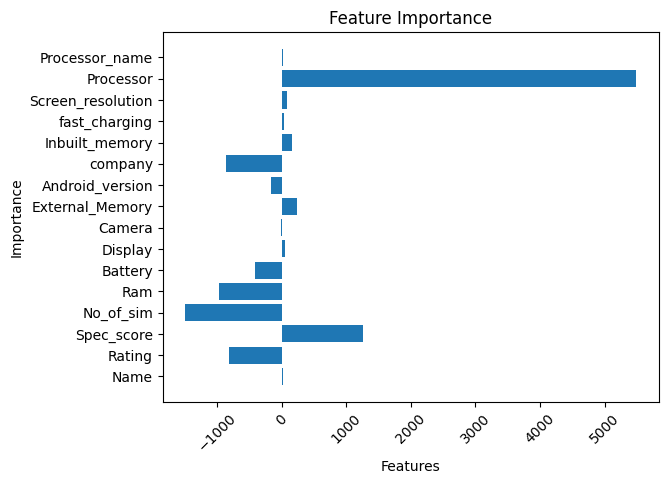

In [ ]:
# Do k-fold cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(lm, X_train, y_train, cv=kf)
# Mean, std and confidence interval of the cross-validation
print(np.mean(cv_results), np.std(cv_results), np.quantile(cv_results, [0.025, 0.975])) # 95% confidence interval

# Visualize Feature importance
names = X.columns
importance = lm.fit(X, y).coef_
plt.barh(names, importance, align='center')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

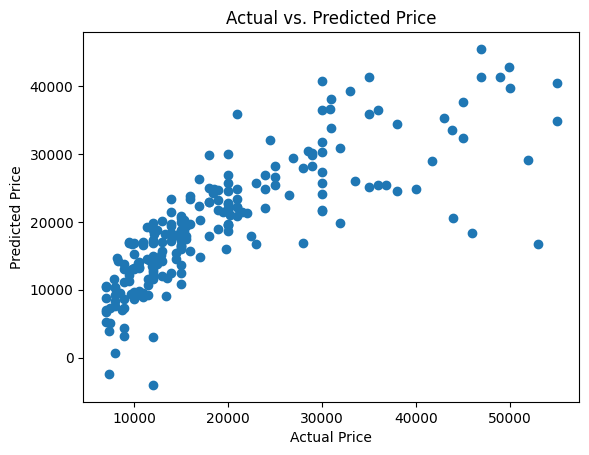

In [ ]:
# plot regression line
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

In [ ]:
plt.plot(X, lm.predict(X.values.reshape(-1, 1)), color='red')
plt.title('Actual vs. Predicted Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 16 features as input.

In [ ]:
X.values.reshape(-1, 1).shape

(11760, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)

In [ ]:
print(model.n_features_in_)  # For sklearn 0.24+

NameError: name 'model' is not defined